In [1]:
pip install matplotlib pandas seaborn calmap

Note: you may need to restart the kernel to use updated packages.


### Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap

Link to data source: https://www.kaggle.com/aungpyaeap/supermarket-sales

**Context**

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

**Data Dictionary**

1. ***Invoice id:*** Computer generated sales slip invoice identification number

2. ***Branch:*** Branch of supercenter (3 branches are available identified by A, B and C).

3. ***City:*** Location of supercenters

4. ***Customer type:*** Type of customers, recorded by Members for customers using member card and Normal for without member card.

5. ***Gender:*** Gender type of customer

6. ***Product line:*** General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

7. ***Unit price:*** Price of each product in USD

8. ***Quantity:*** Number of products purchased by customer

9. ***Tax:*** 5% tax fee for customer buying

10. ***Total:*** Total price including tax

11. ***Date:*** Date of purchase (Record available from January 2019 to March 2019)

12. ***Time:*** Purchase time (10am to 9pm)

13. ***Payment:*** Payment used by customer for purchase (3 methods are available \u2013 Cash, Credit card and Ewallet)

14. ***COGS:*** Cost of goods sold

15. ***Gross margin percentage:*** Gross margin percentage

16. ***Gross income:*** Gross income

17. ***Rating:*** Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

### Task 1: Initial Data Exploration

In [3]:
df = pd.read_csv('supermarket_sales.csv')

In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,149-71-6266,B,Mandalay,Member,Male,Sports and travel,78.07,9.0,35.1315,737.7615,1/28/2019,12:43,Cash,702.63,4.761905,35.1315,4.5
1,640-49-2076,B,Mandalay,Normal,Male,Sports and travel,83.78,8.0,33.5120,703.7520,1/10/2019,14:49,Cash,670.24,4.761905,33.5120,5.1
2,595-11-5460,A,Yangon,NaN,Male,Health and beauty,96.58,2.0,9.6580,202.8180,3/15/2019,10:12,Credit card,193.16,4.761905,9.6580,5.1
3,183-56-6882,C,Naypyitaw,NaN,Female,Food and beverages,99.42,4.0,19.8840,417.5640,2/6/2019,10:42,Ewallet,397.68,4.761905,19.8840,7.5
4,232-16-2483,C,Naypyitaw,NaN,Female,Sports and travel,68.12,1.0,3.4060,71.5260,1/7/2019,12:28,Ewallet,68.12,4.761905,3.4060,6.8


In [5]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [6]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                   float64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0     2019-01-28
1     2019-01-10
2     2019-03-15
3     2019-02-06
4     2019-01-07
         ...    
967   2019-02-22
968   2019-02-18
969   2019-02-18
970   2019-03-10
971   2019-01-26
Name: Date, Length: 972, dtype: datetime64[ns]

In [8]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                          float64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [9]:
df.set_index('Date', inplace=True)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-28,149-71-6266,B,Mandalay,Member,Male,Sports and travel,78.07,9.0,35.1315,737.7615,12:43,Cash,702.63,4.761905,35.1315,4.5
2019-01-10,640-49-2076,B,Mandalay,Normal,Male,Sports and travel,83.78,8.0,33.5120,703.7520,14:49,Cash,670.24,4.761905,33.5120,5.1
2019-03-15,595-11-5460,A,Yangon,NaN,Male,Health and beauty,96.58,2.0,9.6580,202.8180,10:12,Credit card,193.16,4.761905,9.6580,5.1
2019-02-06,183-56-6882,C,Naypyitaw,NaN,Female,Food and beverages,99.42,4.0,19.8840,417.5640,10:42,Ewallet,397.68,4.761905,19.8840,7.5
2019-01-07,232-16-2483,C,Naypyitaw,NaN,Female,Sports and travel,68.12,1.0,3.4060,71.5260,12:28,Ewallet,68.12,4.761905,3.4060,6.8


In [10]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,965.000000,952.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000
mean,55.646093,5.505252,15.366447,322.695377,307.328930,4.761905,15.366447,6.982099
std,26.564106,2.936763,11.759974,246.959461,235.199487,0.000000,11.759974,1.715738
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905,0.508500,4.000000
25%,32.620000,3.000000,5.833875,122.511375,116.677500,4.761905,5.833875,5.500000
50%,55.390000,5.000000,12.066000,253.386000,241.320000,4.761905,12.066000,7.000000
75%,77.950000,8.000000,22.445250,471.350250,448.905000,4.761905,22.445250,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905,49.650000,10.000000


### Task 2: Univariate Analysis

**Question 1:** What does the distribution of customer ratings looks like? Is it skewed?

C:\Users\Dominc\AppData\Local\Temp\ipykernel_22092\1675757968.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rating'])


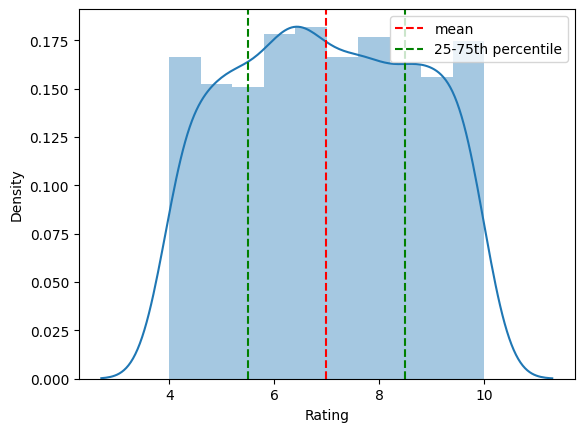

In [11]:
sns.distplot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']),c='red',ls='--',label='mean')
plt.axvline(x=np.percentile(df['Rating'],25),c='green',ls='--',label='25-75th percentile')
plt.axvline(x=np.percentile(df['Rating'],75),c='green',ls='--')
plt.legend()


**Question 2:** Do aggregate sales numbers differ by much between branches?

<AxesSubplot: xlabel='Branch', ylabel='count'>

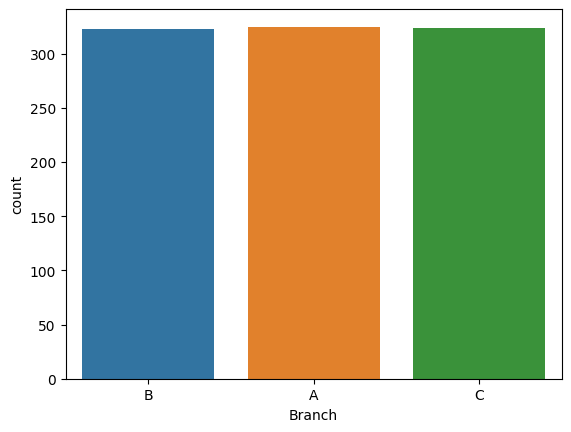

In [13]:
sns.countplot(data=df, x=df['Branch'])

In [14]:
df['Branch'].value_counts()

A    325
C    324
B    323
Name: Branch, dtype: int64

<AxesSubplot: xlabel='Payment', ylabel='count'>

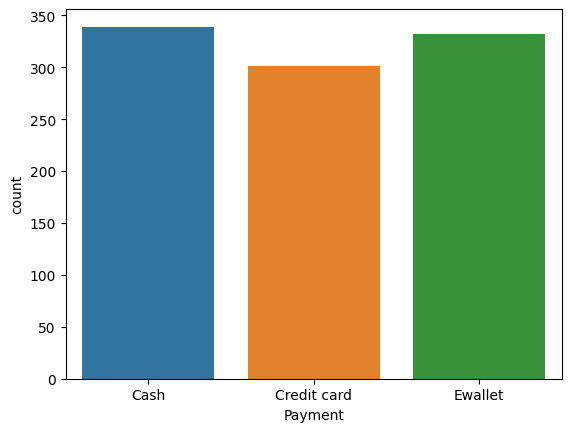

In [15]:
sns.countplot(data=df, x=df['Payment'])


### Task 3: Bivariate Analysis

**Question 3:** Is there a relationship between gross income and customer ratings?

<AxesSubplot: xlabel='Rating', ylabel='gross income'>

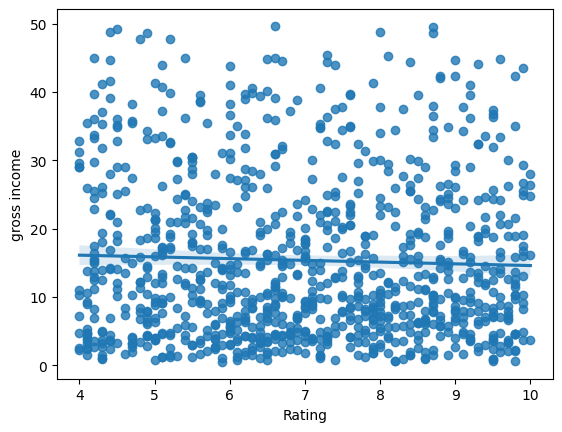

In [16]:
sns.regplot(x=df['Rating'], y=df['gross income'])

<AxesSubplot: xlabel='Branch', ylabel='gross income'>

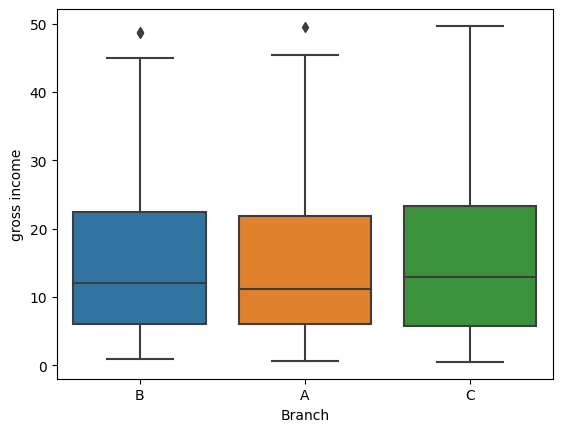

In [17]:
sns.boxplot(x=df['Branch'],y=df['gross income'])

<AxesSubplot: xlabel='Gender', ylabel='gross income'>

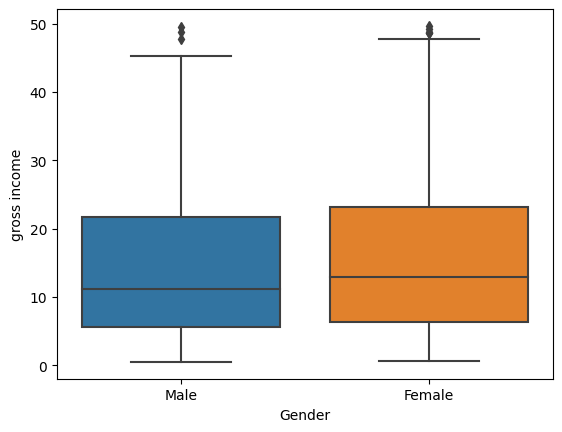

In [18]:
sns.boxplot(x=df['Gender'],y=df['gross income'])

In [19]:
data_agg = df.groupby(df.index).mean()
data_agg

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,
2019-01-01,53.394545,6.500000,18.561636,389.794364,371.232727,4.761905,18.561636,6.554545
2019-01-02,44.635000,6.000000,11.580375,243.187875,231.607500,4.761905,11.580375,6.050000
2019-01-03,59.457500,4.625000,12.369813,259.766062,247.396250,4.761905,12.369813,8.112500
2019-01-04,51.743333,5.333333,12.886417,270.614750,257.728333,4.761905,12.886417,6.516667
2019-01-05,60.450000,4.363636,12.933818,271.610182,258.676364,4.761905,12.933818,7.281818
...,...,...,...,...,...,...,...,...
2019-03-26,42.972308,4.000000,7.188692,150.962538,143.773846,4.761905,7.188692,6.623077
2019-03-27,56.841000,4.500000,13.822950,290.281950,276.459000,4.761905,13.822950,6.760000
2019-03-28,45.525000,4.800000,10.616200,222.940200,212.324000,4.761905,10.616200,7.050000


<AxesSubplot: xlabel='Date', ylabel='gross income'>

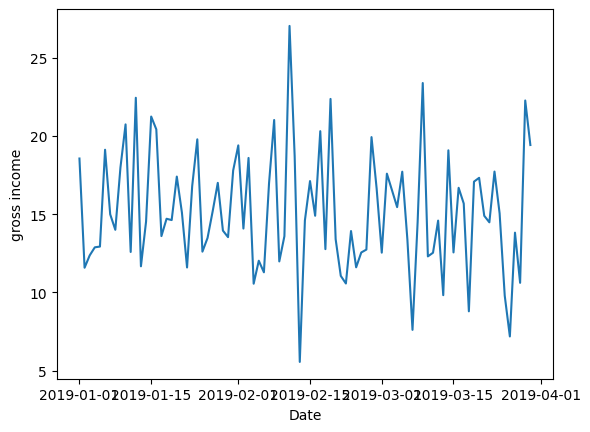

In [20]:
sns.lineplot(x=data_agg.index, y=data_agg['gross income'])

### Task 4: Dealing With Duplicate Rows and Missing Values

In [31]:
df.duplicated().sum()

3

In [32]:
df[df.duplicated()==True]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-02-18,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.919,649.299,13:28,Cash,618.38,4.761905,30.919,6.6
2019-03-10,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,NaN,2.0,5.803,121.863,20:46,Ewallet,116.06,4.761905,5.803,8.8
2019-01-26,452-04-8808,B,Mandalay,Normal,Male,Electronic accessories,87.08,NaN,30.478,640.038,15:17,Cash,609.56,4.761905,30.478,5.5


In [34]:
df.drop_duplicates(inplace=True)

In [36]:
df.duplicated().sum()

0

In [37]:
df.isna().sum()/len(df)

Invoice ID                 0.000000
Branch                     0.000000
City                       0.000000
Customer type              0.080495
Gender                     0.000000
Product line               0.040248
Unit price                 0.006192
Quantity                   0.019608
Tax 5%                     0.000000
Total                      0.000000
Time                       0.000000
Payment                    0.000000
cogs                       0.000000
gross margin percentage    0.000000
gross income               0.000000
Rating                     0.000000
dtype: float64

<AxesSubplot: ylabel='Date'>

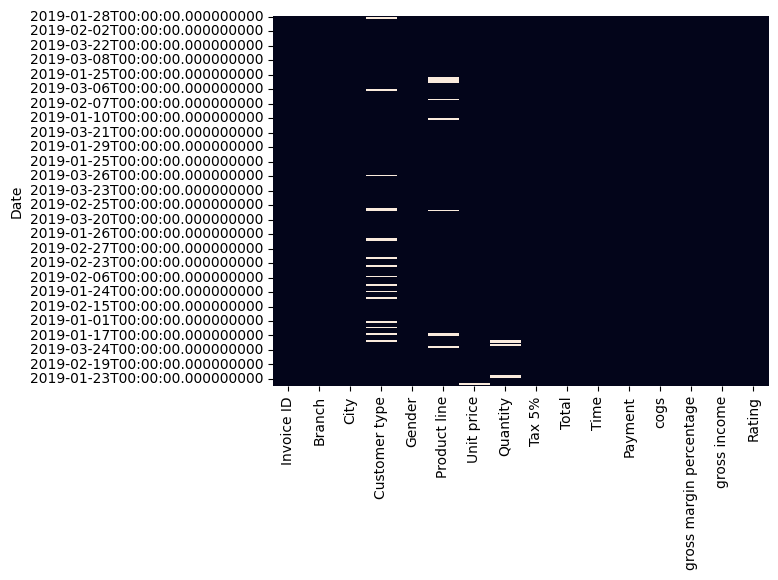

In [38]:
sns.heatmap(df.isnull(),cbar=False)

In [39]:
df.fillna(df.mean(),inplace=True)

In [40]:
df.mode().iloc[0]
df.fillna(df.mode().iloc[0],inplace=True)

<AxesSubplot: ylabel='Date'>

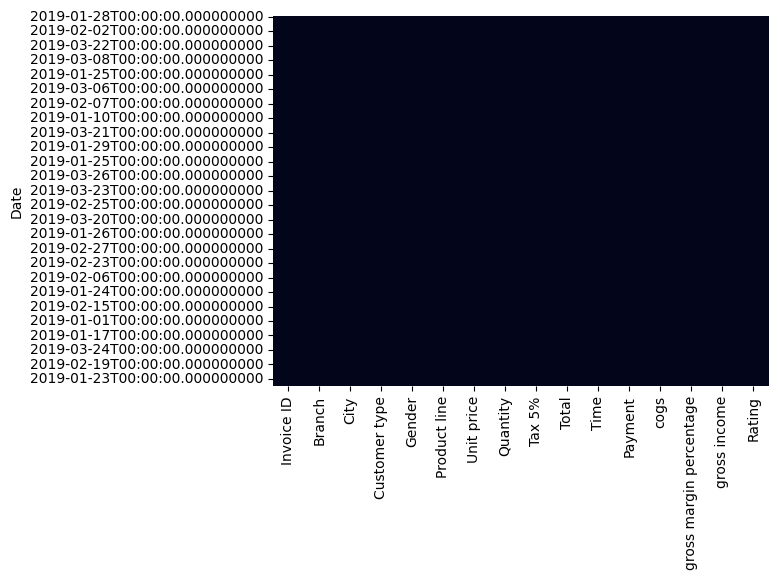

In [42]:
sns.heatmap(df.isnull(),cbar=False)

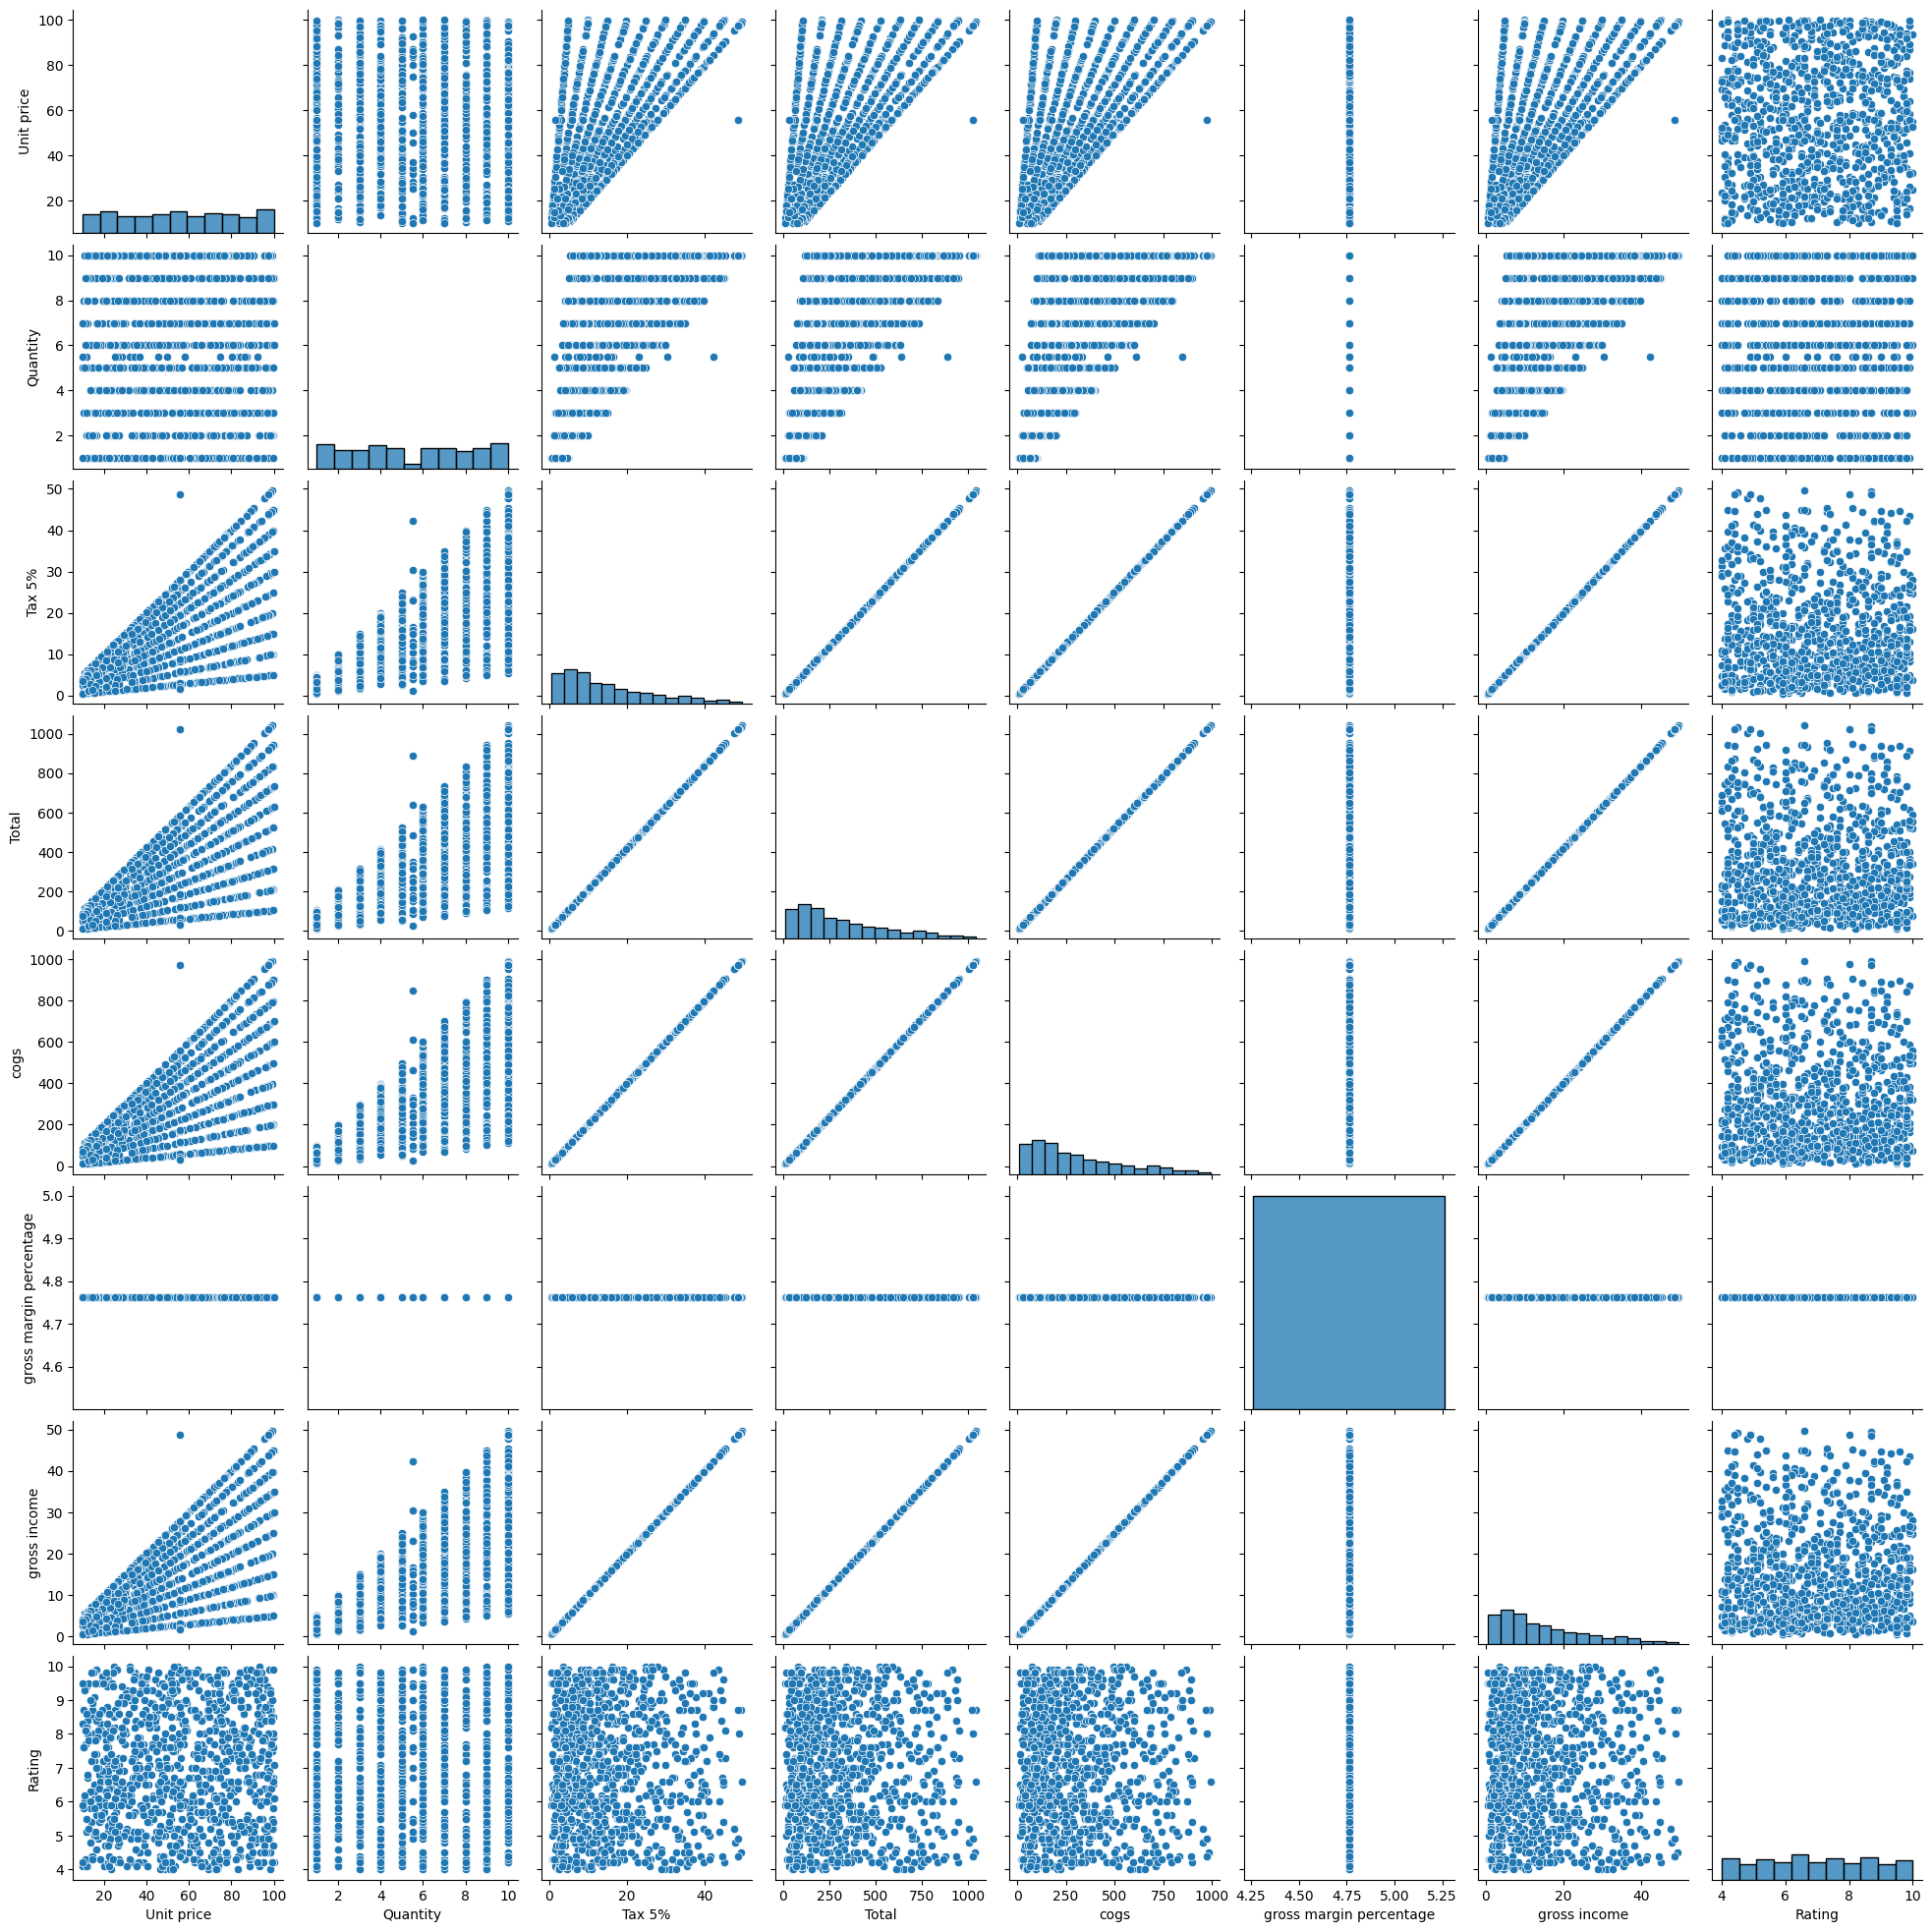

In [44]:
sns.pairplot(data=df)

### Task 5: Correlation Analysis

In [28]:
round(np.corrcoef(df['gross income'], df['Rating'])[1][0],2)

-0.04

In [29]:
np.round(df.corr(),2)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.00,0.01,0.63,0.63,0.63,0.0,0.63,0.00
Quantity,0.01,1.00,0.71,0.71,0.71,0.0,0.71,-0.03
Tax 5%,0.63,0.71,1.00,1.00,1.00,-0.0,1.00,-0.04
Total,0.63,0.71,1.00,1.00,1.00,0.0,1.00,-0.04
cogs,0.63,0.71,1.00,1.00,1.00,0.0,1.00,-0.04
gross margin percentage,0.00,0.00,-0.00,0.00,0.00,1.0,-0.00,0.00
gross income,0.63,0.71,1.00,1.00,1.00,-0.0,1.00,-0.04
Rating,0.00,-0.03,-0.04,-0.04,-0.04,0.0,-0.04,1.00


<AxesSubplot: >

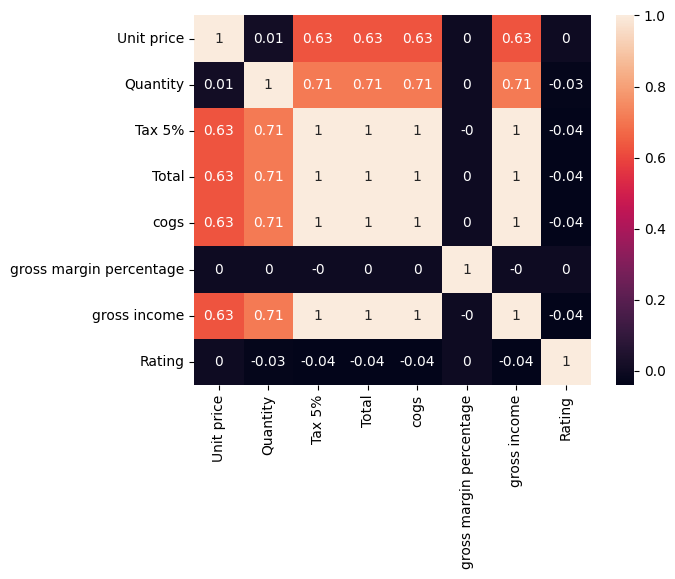

In [30]:
sns.heatmap(np.round(df.corr(),2), annot=True)